## Import Libreries

In [1]:
import numpy as np
from keras import layers, models
from keras.datasets import reuters
import matplotlib.pyplot as plt
from keras import regularizers

In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [3]:
word_index = reuters.get_word_index()

In [4]:
word_index = dict([(value, key) for (key,value) in word_index.items()])

In [5]:
def vectorize(sequence, dim=10000):
    result = np.zeros((len(sequence), dim))
    for i, sequence in enumerate(sequence):
        result[i, sequence] = 1
    return result

In [6]:
x_train = vectorize(train_data)
x_test = vectorize(test_data)

In [7]:
from keras.utils import to_categorical

In [8]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [9]:
y_train.shape

(8982, 46)

In [10]:
model1 = models.Sequential()
model1.add(layers.Dense(64, activation='relu', input_shape= (10000,)))
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dense(46, activation='softmax'))

c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [13]:
history1 = model1.fit(partial_x_train, partial_y_train, epochs = 30, batch_size= 30, validation_data=(x_val,y_val))

Epoch 1/30
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6051 - loss: 1.8736 - val_accuracy: 0.7650 - val_loss: 1.0355
Epoch 2/30
267/267 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8302 - loss: 0.7823 - val_accuracy: 0.8180 - val_loss: 0.8666
Epoch 3/30
267/267 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9000 - loss: 0.4743 - val_accuracy: 0.8250 - val_loss: 0.8867
Epoch 4/30
267/267 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9337 - loss: 0.3063 - val_accuracy: 0.8290 - val_loss: 0.9199
Epoch 5/30
267/267 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9505 - loss: 0.2242 - val_accuracy: 0.8090 - val_loss: 0.9810
Epoch 6/30
267/267 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9495 - loss: 0.1992 - val_accuracy: 0.8180 - val_loss: 1.0483
Epoch 7/30
267/267 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9575 - loss: 0.1654 - val_accuracy: 0.7840 - val_loss: 1.2054
Epoch 8/30
267/267 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9598 - loss: 0.1509 - val_accuracy: 0.

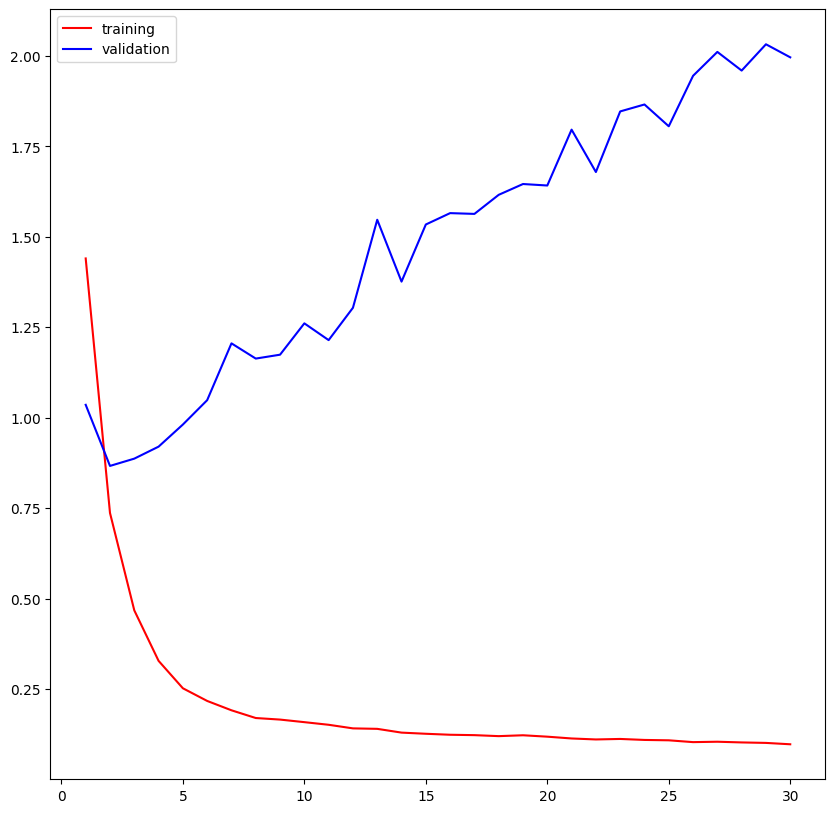

In [14]:
history_dict = history1.history
loss_values = history_dict['loss']
val_loss_values1 = history_dict['val_loss']


fig = plt.figure(figsize=(10,10))
epoch = range(1, len(loss_values)+1)
plt.plot(epoch, loss_values, label = 'training', color = 'red')
plt.plot(epoch, val_loss_values1, label = 'validation', color = 'blue')
plt.legend()
plt.show()

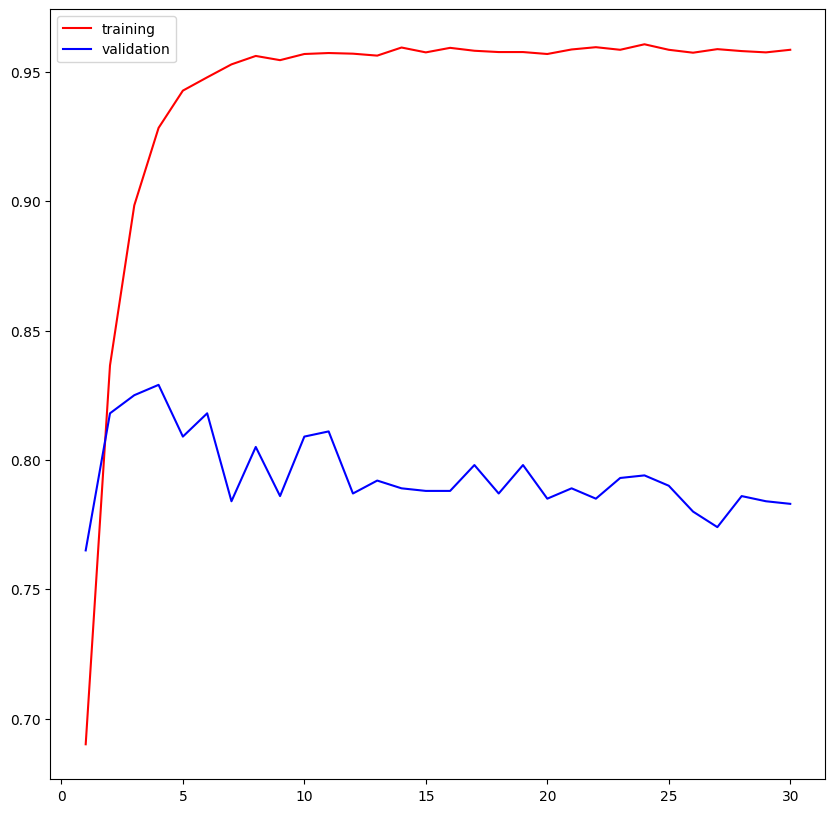

In [15]:
history_dict = history1.history
accuracy_values = history_dict['accuracy']
val_accuracy_values1 = history_dict['val_accuracy']


fig = plt.figure(figsize=(10,10))
epoch = range(1, len(loss_values)+1)
plt.plot(epoch, accuracy_values, label = 'training', color = 'red')
plt.plot(epoch, val_accuracy_values1, label = 'validation', color = 'blue')
plt.legend()
plt.show()

In [16]:
model1.evaluate(x_test, y_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step - accuracy: 0.7782 - loss: 1.9833


[2.045379400253296, 0.7769367694854736]

### changing epochs

In [17]:
history1 = model1.fit(partial_x_train, partial_y_train, epochs = 9, batch_size= 30, validation_data=(x_val,y_val))

Epoch 1/9
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9620 - loss: 0.0822 - val_accuracy: 0.7880 - val_loss: 2.0466
Epoch 2/9
267/267 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9618 - loss: 0.0868 - val_accuracy: 0.7800 - val_loss: 2.0511
Epoch 3/9
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9616 - loss: 0.0818 - val_accuracy: 0.7810 - val_loss: 2.2295
Epoch 4/9
267/267 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9674 - loss: 0.0794 - val_accuracy: 0.7830 - val_loss: 2.2738
Epoch 5/9
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9655 - loss: 0.0788 - val_accuracy: 0.7780 - val_loss: 2.2171
Epoch 6/9
267/267 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9678 - loss: 0.0706 - val_accuracy: 0.7800 - val_loss: 2.3144
Epoch 7/9
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9660 - loss: 0.0762 - val_accuracy: 0.7780 - val_loss: 2.4479
Epoch 8/9
267/267 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9646 - loss: 0.0810 - val_accuracy: 0.7850 - v

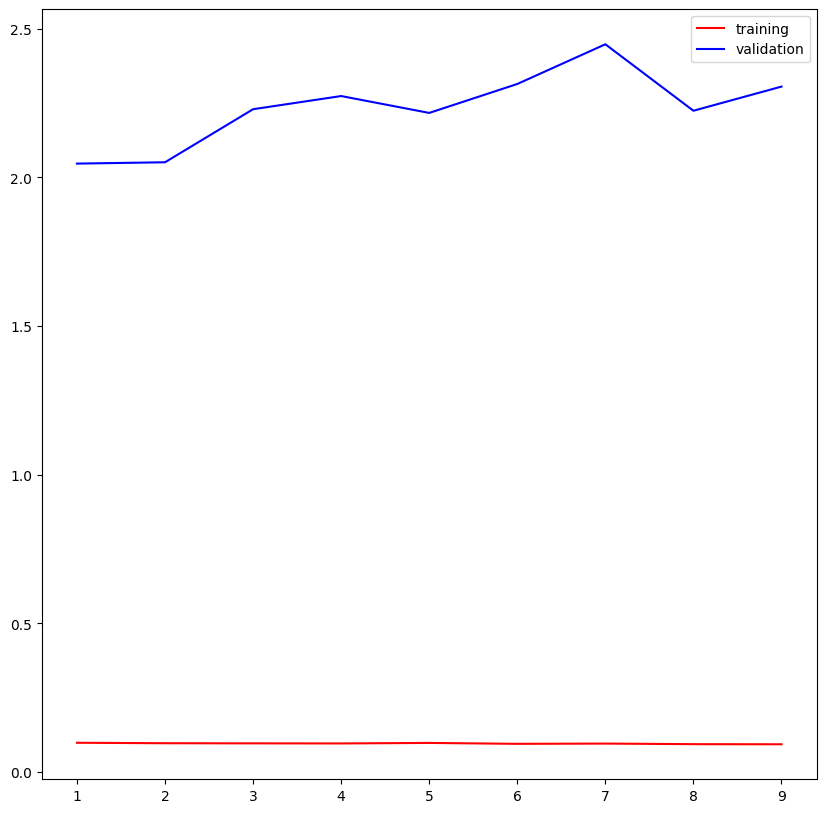

In [18]:
history_dict = history1.history
loss_values = history_dict['loss']
val_loss_values1 = history_dict['val_loss']


fig = plt.figure(figsize=(10,10))
epoch = range(1, len(loss_values)+1)
plt.plot(epoch, loss_values, label = 'training', color = 'red')
plt.plot(epoch, val_loss_values1, label = 'validation', color = 'blue')
plt.legend()
plt.show()

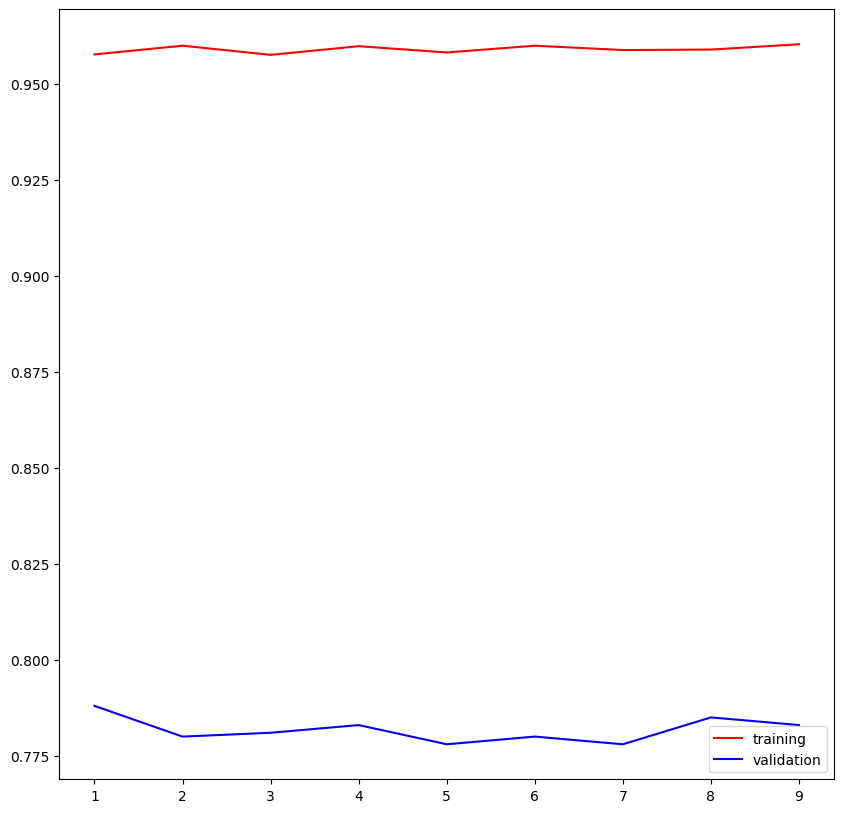

In [19]:
history_dict = history1.history
accuracy_values = history_dict['accuracy']
val_accuracy_values1 = history_dict['val_accuracy']


fig = plt.figure(figsize=(10,10))
epoch = range(1, len(loss_values)+1)
plt.plot(epoch, accuracy_values, label = 'training', color = 'red')
plt.plot(epoch, val_accuracy_values1, label = 'validation', color = 'blue')
plt.legend()
plt.show()

In [20]:
model1.evaluate(x_test,y_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 712us/step - accuracy: 0.7754 - loss: 2.2699


[2.339691638946533, 0.7689225077629089]

## My Model

In [32]:
model2 = models.Sequential()
model2.add(layers.Dense(32, activation='sigmoid', input_shape= (10000,), kernel_regularizer= regularizers.l2(0.001)))
model2.add(layers.BatchNormalization())
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(32, activation='sigmoid', kernel_regularizer= regularizers.l2(0.001)))
model2.add(layers.BatchNormalization())
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(32, activation='sigmoid', kernel_regularizer= regularizers.l2(0.001)))
model2.add(layers.BatchNormalization())
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(32, activation='relu', kernel_regularizer= regularizers.l2(0.0001)))
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(46, activation='softmax'))

model2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
# model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
# model2 = models.Sequential()
# model2.add(layers.Dense(16, activation='sigmoid', input_shape=(10000,), kernel_regularizer=regularizers.l2(0.0001)))
# model2.add(layers.BatchNormalization())
# model2.add(layers.Dropout(0.5))
# model2.add(layers.Dense(16, activation='sigmoid', kernel_regularizer=regularizers.l2(0.0001)))
# model2.add(layers.BatchNormalization())
# model2.add(layers.Dropout(0.5))
# model2.add(layers.Dense(16, activation='sigmoid', kernel_regularizer=regularizers.l2(0.0001)))
# model2.add(layers.BatchNormalization())
# model2.add(layers.Dropout(0.5))
# model2.add(layers.Dense(46, activation='softmax'))


# model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [33]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [35]:
history2 = model2.fit(partial_x_train, partial_y_train, epochs = 30, batch_size= 17, validation_data=(x_val,y_val))

Epoch 1/30
470/470 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5786 - loss: 1.9551 - val_accuracy: 0.6790 - val_loss: 1.6146
Epoch 2/30
470/470 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5663 - loss: 1.9499 - val_accuracy: 0.6720 - val_loss: 1.6542
Epoch 3/30
470/470 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5834 - loss: 1.8938 - val_accuracy: 0.6740 - val_loss: 1.5865
Epoch 4/30
470/470 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5812 - loss: 1.8747 - val_accuracy: 0.6740 - val_loss: 1.5795
Epoch 5/30
470/470 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6070 - loss: 1.7644 - val_accuracy: 0.6740 - val_loss: 1.5672
Epoch 6/30
470/470 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6221 - loss: 1.7351 - val_accuracy: 0.6700 - val_loss: 1.5581
Epoch 7/30
470/470 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6130 - loss: 1.7537 - val_accuracy: 0.6740 - val_loss: 1.5458
Epoch 8/30
470/470 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6240 - loss: 1.7445 - val_accuracy: 0.

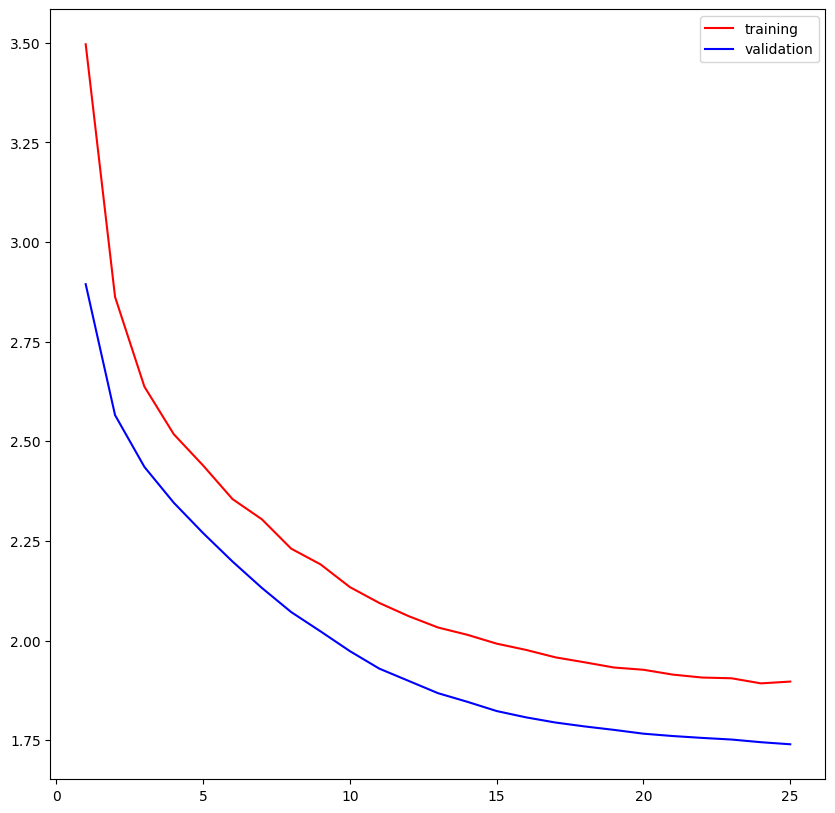

In [29]:
history_dict = history2.history
loss_values = history_dict['loss']
val_loss_values1 = history_dict['val_loss']


fig = plt.figure(figsize=(10,10))
epoch = range(1, len(loss_values)+1)
plt.plot(epoch, loss_values, label = 'training', color = 'red')
plt.plot(epoch, val_loss_values1, label = 'validation', color = 'blue')
plt.legend()
plt.show()

In [30]:
model2.evaluate(x_test,y_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 821us/step - accuracy: 0.6028 - loss: 1.7638


[1.7926149368286133, 0.5912733674049377]